<a href="https://colab.research.google.com/github/susannadluca/lab_analysedereseaux/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Basic measures

This notebook contains a mix of tutorials based on Filippo Menczer, Santo Fortunato and Clayton A. Davis' *A First Course in Network Science* (2020) adapted by Katarzyna Anna Kapitan for the needs of ENC NA HN class.

*Note: The notebook runs on Python 3.10 so run it in the venv with this version of Python that you created last week to make sure everything runs smoothly.*

## A Quick Recap
In Lab 1, we created a simple actor network in the following way:

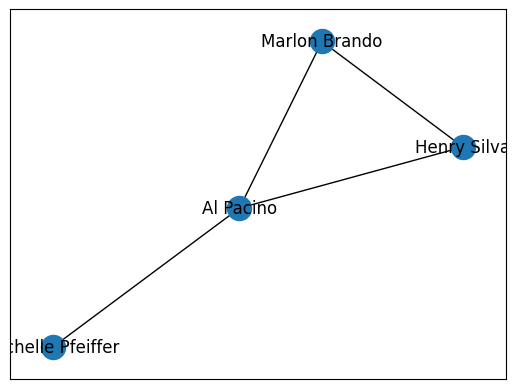

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
actorRels = [
["Marlon Brando", "Al Pacino"],
["Marlon Brando", "Henry Silva"],
["Henry Silva", "Al Pacino"],
["Al Pacino", "Michelle Pfeiffer"]
]
actorGraph = nx.Graph()
actorGraph.add_edges_from(actorRels)
nx.draw_networkx(actorGraph)


We have also learned how to add information about new relationshis.
For example, if we wanted to note that Al Pacino was co-starring with Margot Robbie in *Once Upon a Time... in Hollywood* (2019), we can use the `add_edge` method to do that.  

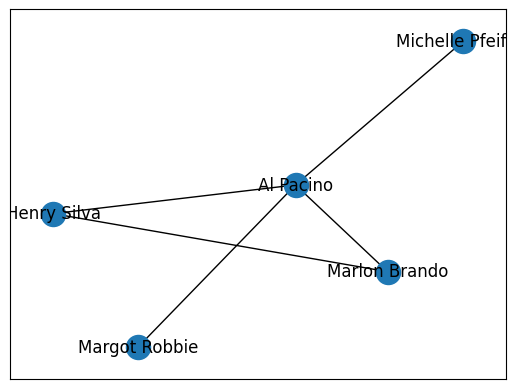

In [34]:
actorGraph.add_edge("Al Pacino", "Margot Robbie")
nx.draw_networkx(actorGraph)

We have also learned that we can add more than one new relationship by creating a new list of relationships and additing it with `add_edges_from` method.

Let's add three more actors who starred in *Once Upon a Time...in Hollywood* together with Robbie and Pacino: Leonardo DiCaprio, Brad Pitt, and Emile Hirsch.


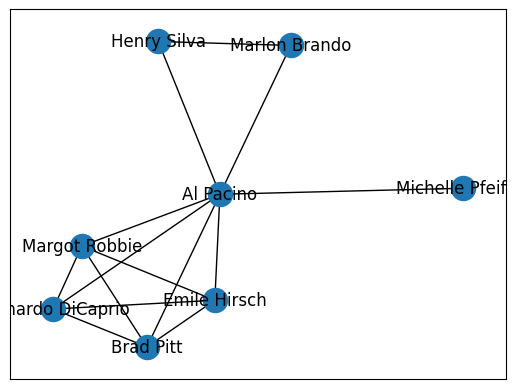

In [35]:
additionalRels = [
["Margot Robbie", "Leonardo DiCaprio"],
["Margot Robbie", "Brad Pitt"],
["Margot Robbie", "Emile Hirsch"],
["Al Pacino", "Leonardo DiCaprio"],
["Al Pacino", "Brad Pitt"],
["Al Pacino", "Emile Hirsch"],
["Leonardo DiCaprio", "Brad Pitt"],
["Leonardo DiCaprio", "Emile Hirsch"],
["Brad Pitt", "Emile Hirsch"]
]
actorGraph.add_edges_from(additionalRels)
nx.draw_networkx(actorGraph)

## Graph methods

The graph object has some properties and methods that allow you to access information about the whole graph.

Last week you saw that we can get the number of nodes and edges in a graph using the `number_of_` methods.

In [36]:
actorGraph.number_of_edges()

14

In [37]:
actorGraph.number_of_nodes()

8

You can also list all of the nodes (NodeView object):

In [38]:
actorGraph.nodes()

NodeView(('Marlon Brando', 'Al Pacino', 'Henry Silva', 'Michelle Pfeiffer', 'Margot Robbie', 'Leonardo DiCaprio', 'Brad Pitt', 'Emile Hirsch'))

and all the edges (EdgeView object):

In [39]:
actorGraph.edges()

EdgeView([('Marlon Brando', 'Al Pacino'), ('Marlon Brando', 'Henry Silva'), ('Al Pacino', 'Henry Silva'), ('Al Pacino', 'Michelle Pfeiffer'), ('Al Pacino', 'Margot Robbie'), ('Al Pacino', 'Leonardo DiCaprio'), ('Al Pacino', 'Brad Pitt'), ('Al Pacino', 'Emile Hirsch'), ('Margot Robbie', 'Leonardo DiCaprio'), ('Margot Robbie', 'Brad Pitt'), ('Margot Robbie', 'Emile Hirsch'), ('Leonardo DiCaprio', 'Brad Pitt'), ('Leonardo DiCaprio', 'Emile Hirsch'), ('Brad Pitt', 'Emile Hirsch')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [40]:
for node in actorGraph.nodes:
    print(node)

Marlon Brando
Al Pacino
Henry Silva
Michelle Pfeiffer
Margot Robbie
Leonardo DiCaprio
Brad Pitt
Emile Hirsch


In [41]:
for edge in actorGraph.edges:
    print(edge)

('Marlon Brando', 'Al Pacino')
('Marlon Brando', 'Henry Silva')
('Al Pacino', 'Henry Silva')
('Al Pacino', 'Michelle Pfeiffer')
('Al Pacino', 'Margot Robbie')
('Al Pacino', 'Leonardo DiCaprio')
('Al Pacino', 'Brad Pitt')
('Al Pacino', 'Emile Hirsch')
('Margot Robbie', 'Leonardo DiCaprio')
('Margot Robbie', 'Brad Pitt')
('Margot Robbie', 'Emile Hirsch')
('Leonardo DiCaprio', 'Brad Pitt')
('Leonardo DiCaprio', 'Emile Hirsch')
('Brad Pitt', 'Emile Hirsch')


Some graph methods take an edge or node as argument.

These provide the graph properties of the given edge or node.

For example, the `.neighbors()` method gives the nodes linked to the given node:

In [42]:
# list of neighbors of node 'Brad Pitt'
actorGraph.neighbors('Brad Pitt')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [43]:
for neighbor in actorGraph.neighbors('Brad Pitt'):
    print(neighbor)

Margot Robbie
Al Pacino
Leonardo DiCaprio
Emile Hirsch


You can always use the `list` constructor to make a list from an iterator:

In [44]:
list(actorGraph.neighbors('Brad Pitt'))

['Margot Robbie', 'Al Pacino', 'Leonardo DiCaprio', 'Emile Hirsch']

## Testing simple measures
During the lecture today we've learned about degree and density.

In an undirected and unweighted network a degree of a node is the number of links a node has to other nodes (so basically it is a number of its neighbors).


Therefore, when you have a list of neighbors of a node you can quite easily calculate the degree of the node in question, by simply checking the length of your list.

In [45]:
len(list(actorGraph.neighbors('Brad Pitt')))

4

In `NetworkX` there is a quicker method of getting there: the `degree` method.

We use the `G.degree()` method for a list of all degrees of all the nodes, or, to get a degree of a selected node we simply specify this node as the argument passed to the degree method, `G.degree('a')`

In [46]:
actorGraph.degree('Brad Pitt')

4

In [47]:
print("The degrees of my nodes are:", actorGraph.degree())

The degrees of my nodes are: [('Marlon Brando', 2), ('Al Pacino', 7), ('Henry Silva', 2), ('Michelle Pfeiffer', 1), ('Margot Robbie', 4), ('Leonardo DiCaprio', 4), ('Brad Pitt', 4), ('Emile Hirsch', 4)]


During the lecture, you learned that the density of the network is the fraction of possible links in the network.

We could calculate it by listing all the links and counting them.

In [48]:
list_rels = []
for edge in actorGraph.edges:
    list_rels.append(edge)
print(list_rels)


[('Marlon Brando', 'Al Pacino'), ('Marlon Brando', 'Henry Silva'), ('Al Pacino', 'Henry Silva'), ('Al Pacino', 'Michelle Pfeiffer'), ('Al Pacino', 'Margot Robbie'), ('Al Pacino', 'Leonardo DiCaprio'), ('Al Pacino', 'Brad Pitt'), ('Al Pacino', 'Emile Hirsch'), ('Margot Robbie', 'Leonardo DiCaprio'), ('Margot Robbie', 'Brad Pitt'), ('Margot Robbie', 'Emile Hirsch'), ('Leonardo DiCaprio', 'Brad Pitt'), ('Leonardo DiCaprio', 'Emile Hirsch'), ('Brad Pitt', 'Emile Hirsch')]


In [49]:
print(len(list_rels))

14


Or by using the `number_of` method

In [50]:
actorGraph.number_of_edges()

14

To calculate density we first need the maximum number of links, which in undirected network is: L_max = (N * (N - 1))/2

In [51]:
N = actorGraph.number_of_nodes()

L_max = (N * (N - 1))/2
print(L_max)

28.0


and then we need the number of actual links

In [52]:
L = len(list_rels)
d = L/L_max
print(d)

0.5


In `NetworkX` there is a quicker way of getting there.
We can use the  `nx.density(G)` function to calculate the density of the network.

Note that until now we were using graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and often only, argument. `nx.density(G)` is one of the NetworkX module functions that provide information about a graph:


In [53]:
print("The density is:", nx.density(actorGraph))


The density is: 0.5


# Exercise

Recreate our simple four-node digraph from the lecture (directed and unweighted) [Slide 7].


The graph has the following edges:

- edge from node 1 to node 2
- edge from node 1 to node 3
- edge from node 3 to node 2
- edge from node 3 to node 4
- edge from node 4 to node 3

You can use
`D = nx.DiGraph()` to create a directed graph.

Your first task is to calculate  
- the density (and test it by comparing the number of links to a complete directed graph with the same number of nodes)
- degrees of all the nodes  (both in-degree and out-degree). You can use the `in_degree` and `out_degree` methods.
- Average degrees in this network

Then list the following values:
- the total degree of node 1
- In-degree of node 1
- Out-degree of node 1


Finally, write a function max_out_degree that allows you to find the nodes with the highest out-degree:
- the function is supposed to take a graph as its argument
- the function is supposed to return a tuple with the name of the node with the highest out_degree and the value of its out_degree.
- Run this function on your digraph. Are you happy with the result?

*Hint: Two nodes in our network have the same out-degree: node 1 and node 3, how can you change your function, so you don't miss the other node?*




In [54]:
#LABORATORIO 2 - WEEK 2
#4 FEBBRAIO 2026
#ESERCIZI SULLE MISURE DI BASE: NEIGHBOUR, DEGREE, DENSITY, LINK MAX (...)

In [55]:
#CREAZIONE DEL GRAFICO E AGGIUNTA DEGLI ARCHI

import networkx as nx

D = nx.DiGraph()

D.add_edges_from([
    (1, 2),
    (1, 3),
    (3, 2),
    (3, 4),
    (4, 3),
])

print(D)
print("N (nodes):", D.number_of_nodes())
print("L (edges):", D.number_of_edges())


DiGraph with 4 nodes and 5 edges
N (nodes): 4
L (edges): 5


In [56]:
#INIZIO A SVOLGERE LE TASK
#Calcolo della Densità

N = D.number_of_nodes()
L = D.number_of_edges()

L_max = N * (N - 1)
density_manual = L / L_max

print("N =", N)
print("L =", L)
print("L_max (complete directed) =", L_max)
print("density (manual) =", density_manual)

print("density (networkx) =", nx.density(D))


N = 4
L = 5
L_max (complete directed) = 12
density (manual) = 0.4166666666666667
density (networkx) = 0.4166666666666667


In [57]:
#In-degree e Out-degree di tutti i nodi
print("In-degrees:", list(D.in_degree()))
print("Out-degrees:", list(D.out_degree()))


In-degrees: [(1, 0), (2, 2), (3, 2), (4, 1)]
Out-degrees: [(1, 2), (2, 0), (3, 2), (4, 1)]


In [58]:
#Total degree (in+out) di tutti i nodi
print("Total degrees:", list(D.degree()))


Total degrees: [(1, 2), (2, 2), (3, 4), (4, 2)]


In [59]:
#AVERAGE DEGREE
avg_in = L / N
avg_out = L / N
avg_total = (2 * L) / N

print("Average in-degree:", avg_in)
print("Average out-degree:", avg_out)
print("Average total degree:", avg_total)



Average in-degree: 1.25
Average out-degree: 1.25
Average total degree: 2.5


In [60]:
print(D)

DiGraph with 4 nodes and 5 edges


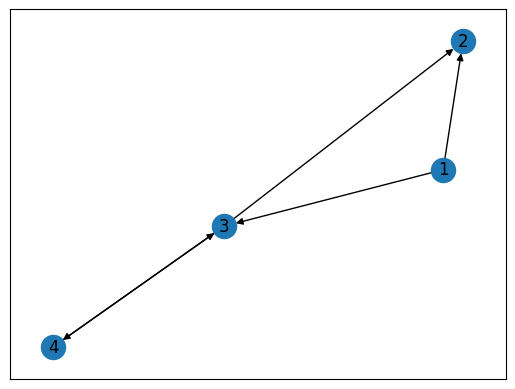

In [61]:
nx.draw_networkx(D)

In [62]:
#CELLA DIDATTICA AGGIUNTA DALLA PROF: stampa generale dei degree di ciascun nodo
#non aggiunge calcoli ma mostra in modo chiaro i risultati già ottenuti

D.degree()

DiDegreeView({1: 2, 2: 2, 3: 4, 4: 2})

In [63]:
#FARE UNA LISTA DEI SEGUENTI VALORI:
#total degree of node 1
#in-degree of node 1
#out-degree of node 1

In [64]:
print("Total degree of node 1:", D.degree(1))
print("In-degree of node 1:", D.in_degree(1))
print("Out-degree of node 1:", D.out_degree(1))


Total degree of node 1: 2
In-degree of node 1: 0
Out-degree of node 1: 2


In [66]:
#Function max_out_degree that allows you to find the nodes with the highest out-degree
# la funzione deve avere il grafico come argomento ()
# la funzione deve ritornare una tupla (con nome del nodo con highest out-degree e valore)

def max_out_degree(G):
    best_node = None
    best_val = -1

    for n in G.nodes():
        v = G.out_degree(n)
        if v > best_val:
            best_val = v
            best_node = n

    return (best_node, best_val)

max_out_degree(D)


(1, 2)

In [ ]:
#DOMANDA: ARE YOU HAPPY WITH THE RESULT?
# Viene fatta questa domanda perchè in questo grafico abbiamo due nodi con
# lo stesso out-degree massimo
# quindi questa versione ti restituisce solo il primo che incontra.

In [67]:
def max_out_degree_all(G):
    # Calcoliamo prima il valore massimo di out-degree nel grafo.
    # Usiamo una comprehension per ottenere l'out-degree di ogni nodo
    # e poi prendiamo il massimo con max().
    max_val = max(G.out_degree(n) for n in G.nodes())

    # Adesso cerchiamo TUTTI i nodi che possiedono proprio quel valore massimo.
    # Questo permette di non perdere eventuali nodi "a pari merito".
    nodes = [n for n in G.nodes() if G.out_degree(n) == max_val]

    # La funzione restituisce una tupla composta da:
    # - la lista dei nodi con out-degree massimo
    # - il valore massimo stesso
    return (nodes, max_val)

max_out_degree_all(D)


([1, 3], 2)

In [ ]:
#La versione precedente (max_out_degree) restituiva un solo nodo, anche quando più nodi avevano lo stesso out-degree massimo.
#In questa ultima versione invece si calcola:
# 1. il valore massimo tra tutti gli out-degree,
# 2. si cercano tutti i nodi che raggiungono quel valore,
# 3. si restituisce una lista di nodi (non solo uno), più il valore massimo.


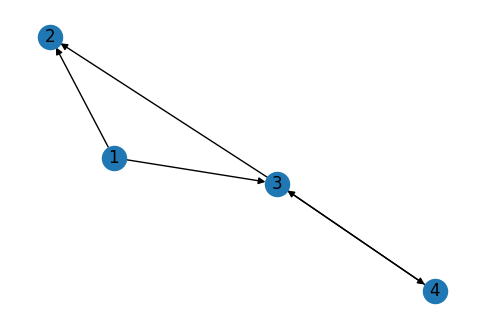

In [68]:
# Rappresentazione del grafo ultimo

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

# Disegniamo il grafo diretto.
# arrows=True indica a NetworkX di mostrare le frecce (orientamento degli archi).
nx.draw_networkx(D, arrows=True)

# Rimuoviamo gli assi (non hanno senso in un grafo).
plt.axis("off")

# Visualizziamo la figura.
plt.show()
